# Ethereum Data Example

In [162]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from ethereum import EthereumData
from plotting import (
    scatter_plot
)
from tqdm import tqdm
from numpy import intersect1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data from local directory

In [60]:
example_dt = "2021-09-01"

eth_data = EthereumData(
    start_date=example_dt, end_date=example_dt, save_path=f"data/{example_dt}"
)

In [61]:
# takes a second
eth_data.load()

Loading blocks...
Loading transactions...
Loading contracts...
Loading logs...
Loading receipts...
Loading token_transfers...
Loading tokens...


In [407]:
merged_transactions = pd.merge(
    left=eth_data.transactions, 
    right=eth_data.receipts, 
    left_on=[
        'hash', 
        'transaction_index', 
        'block_hash', 
        'block_number'
    ],
    right_on=[
        'transaction_hash', 
        'transaction_index', 
        'block_hash', 
        'block_number'
    ]
)

merged_transactions = pd.merge(
    merged_transactions, 
    eth_data.token_transfers, 
    how='left',
    left_on='hash',
    right_on='transaction_hash',
    suffixes=("_trasaction", "_transfer")
)

In [410]:
token_hashes = list(eth_data.token_transfers['transaction_hash'].values)
merged_transactions['is_transfer'] = merged_transactions['hash'].isin(token_hashes)

In [436]:
merged_transactions.head().transpose()

,0,1,2,3,4
hash,0x0c7e291fbd6c6094c53e81b116cca1a5a0ad199c10aa...,0x2567f447d63b76de7fb59e6a36af0614f3cdd6fc1e68...,0x03e5375d7ea8ea68d3c18dec32d75099a287cc232b42...,0x8a15f43c852136141e3417684284df785104adefa739...,0x20126b157dc61a5ef2af7528b4e51aca6ee79ce983e1...
nonce,783,832716,7304,199407,0
block_hash,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...
block_number_trasaction,13136827,13136827,13136827,13136827,13136827
transaction_index,0,1,2,3,4
from_address_trasaction,0x5629eb360b54e146323f8aa34546796029bd78f6,0x1938a448d105d26c40a52a1bfe99b8ca7a745ad0,0xbccec45297ec2877ba96ae86b2fe59f95a0522e6,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,0xb6d0a541e1e94a037a2b3d5e998c1272227c7b92
to_address_trasaction,0x0944d5848bd9f60a34ba92aea300d4286696eb76,0xbb0e17ef65f82ab018d8edd776e8dd940327b28b,0xe000af30955d5d1f539d6ab4dfc2df499cb4f5f7,0xe7703b16ef7cd803ff46703172ef402f07a0ebb2,0x4ad64983349c49defe8d7a4686202d24b25d0ce8
value_trasaction,0,0,189465600000000000,51996000000000000,249587000000000000
gas,70000,200000,50000,60000,21000
gas_price,207438875866,193619607297,163423700000,139162548391,138000000000


In [419]:
t_hash = eth_data.token_transfers['transaction_hash'][1000]

In [422]:
str(t_hash)

'0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a856c6e1774e573d71adb'

In [433]:
eth_data.logs[eth_data.logs['transaction_hash'] == t_hash]

,log_index,transaction_hash,transaction_index,block_hash,block_number,address,data,topics
542906,86,0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a...,84,0xb18741796548eb2338052846a293b3581abdbd7f9996...,13138271,0x9b9647431632af44be02ddd22477ed94d14aacaa,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...


In [437]:
eth_data.token_transfers

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0xea610b1153477720748dc13ed378003941d84fab,0x3b9665d11f4284d77d7833a1efd4c0f8480ece9b,0x155b5ca45861a1b60fdef9a54325f59b8c6610ca,450818000000000000000,0x000010d7f1159a8d3049f1197b6b3986933a8d34ed10...,171,13136829
1,0x3b1bb53b1a42ff61b7399fc196469a742cd3e98d,0x0000000000000000000000000000000000000000,0xa8fa067a530a43fa1878898ba7e0d123bd37bda5,9273,0x000010d7f1159a8d3049f1197b6b3986933a8d34ed10...,173,13136829
2,0x3b1bb53b1a42ff61b7399fc196469a742cd3e98d,0x0000000000000000000000000000000000000000,0xcd75c47b2ec49e92cc673269b53d1a75d023dfc9,8828,0x000010d7f1159a8d3049f1197b6b3986933a8d34ed10...,175,13136829
3,0x8e6cd950ad6ba651f6dd608dc70e5886b1aa6b24,0x8dc834136584da39758b0f6818818f9aada9ea62,0xa5e9c917b4b821e4e0a5bbefce078ab6540d6b5e,209644308528271098701376037,0x000010d7f1159a8d3049f1197b6b3986933a8d34ed10...,176,13136829
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa5e9c917b4b821e4e0a5bbefce078ab6540d6b5e,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1000000000000000000,0x000010d7f1159a8d3049f1197b6b3986933a8d34ed10...,178,13136829
...,...,...,...,...,...,...,...
811271,0x6b175474e89094c44da98b954eedeac495271d0f,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,0x3519d9e46e2f39e1eba859025c06c2c917a7c878,1989815784038667538976,0xffff5c21f27144aaa38773782c37feba730cbf19f675...,192,13142526
811272,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4c46ff32fcf1fcd25bae2e26ed5fd3a682412ffc,0x527d5f10d70ca41e1e0eee8d30b553bb5271ee48,440552980768935669,0xffff90e1684f9472b17a15ed06879c5cb3e33b0c1eb9...,195,13142526
811273,0x6710c63432a2de02954fc0f851db07146a6c0312,0x527d5f10d70ca41e1e0eee8d30b553bb5271ee48,0x4c46ff32fcf1fcd25bae2e26ed5fd3a682412ffc,58457632763625765490463,0xffff9ed9143b4462e49966d193a30d326ec98ee55919...,197,13142526
811274,0x6710c63432a2de02954fc0f851db07146a6c0312,0x4c46ff32fcf1fcd25bae2e26ed5fd3a682412ffc,0x349419bce4181d7d223442fa48ba9e611173a745,58457632763625765490463,0xffffe97969e9099306c4178979624a318f535dacb688...,203,13142526


In [430]:
eth_data.transactions[(eth_data.transactions['hash'] == t_hash)]

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
386690,0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a...,221905,0xb18741796548eb2338052846a293b3581abdbd7f9996...,13138271,84,0x179288a02ee8a939668ddbb0ac21b4fc2a9606a7,0x9b9647431632af44be02ddd22477ed94d14aacaa,0,80000,106000000000,0xa9059cbb000000000000000000000000ae0d526150c8...,1630478994,NaN,NaN,0


In [421]:
merged_transactions.query(f'hash == {str(t_hash)}')

,hash,nonce,block_hash,block_number_trasaction,transaction_index,from_address_trasaction,to_address_trasaction,value_trasaction,gas,gas_price,...,status,effective_gas_price,token_address,from_address_transfer,to_address_transfer,value_transfer,transaction_hash_transfer,log_index,block_number_transfer,is_transfer


In [399]:
address = eth_data.token_transfers['to_address'][1000]

In [401]:
eth_data.token_transfers.loc[1000, 'transaction_hash']

'0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a856c6e1774e573d71adb'

In [402]:
merged_transactions[
    (merged_transactions['to_address'] == address)
]['hash']

894157     0xc6da6a076beb548d55479e26d69122be99b3a74eec38...
1022124    0x7a9587271ac8f3a08270094e48ace604a95b52db886a...
Name: hash, dtype: object

In [375]:
merged_transactions.query(f'from_address == {address}')

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,...,transaction_type,transaction_hash,cumulative_gas_used,gas_used,contract_address,root,status,effective_gas_price,is_transfer,is_contract_creation


In [330]:
merged_transactions['is_contract_creation'] = ~merged_transactions['contract_address'].isna()

In [334]:
merged_transactions.groupby([
    'transaction_type', 'is_contract_creation', 'is_transfer'
]).count().transpose()

transaction_type               0                         1             2  \
is_contract_creation       False         True        False         False   
is_transfer                False   True  False True  False True    False   
hash                      323208  270769   777     5    17   181  381277   
nonce                     323208  270769   777     5    17   181  381277   
block_hash                323208  270769   777     5    17   181  381277   
block_number              323208  270769   777     5    17   181  381277   
transaction_index         323208  270769   777     5    17   181  381277   
from_address              323208  270769   777     5    17   181  381277   
to_address                323208  270769     0     0    17   181  381277   
value                     323208  270769   777     5    17   181  381277   
gas                       323208  270769   777     5    17   181  381277   
gas_price                 323208  270769   777     5    17   181  381277   
input                     323208  270769   777     5    17   181  381277   
block_timestamp           323208  270769   777     5    17   181  381277   
max_fee_per_gas                0       0     0     0     0     0  381277   
max_priority_fee_per_gas       0       0     0     0     0     0  381277   
transaction_hash          323208  270769   777     5    17   181  381277   
cumulative_gas_used       323208  270769   777     5    17   181  381277   
gas_used                  323208  270769   777     5    17   181  381277   
contract_address               0       0   777     5     0     0       0   
root                           0       0     0     0     0     0       0   
status                    323208  270769   777     5    17   181  381277   
effective_gas_price       323208  270769   777     5    17   181  381277   

transaction_type                              
is_contract_creation             True         
is_transfer                True  False True   
hash                      248655   183    32  
nonce                     248655   183    32  
block_hash                248655   183    32  
block_number              248655   183    32  
transaction_index         248655   183    32  
from_address              248655   183    32  
to_address                248655     0     0  
value                     248655   183    32  
gas                       248655   183    32  
gas_price                 248655   183    32  
input                     248655   183    32  
block_timestamp           248655   183    32  
max_fee_per_gas           248655   183    32  
max_priority_fee_per_gas  248655   183    32  
transaction_hash          248655   183    32  
cumulative_gas_used       248655   183    32  
gas_used                  248655   183    32  
contract_address               0   183    32  
root                           0     0     0  
status                    248655   183    32  
effective_gas_price       248655   183    32

### Single Block

In [446]:
block_index = 2000
block_number = eth_data.blocks.loc[block_index, 'number']
block_hash = eth_data.blocks.loc[block_index, 'hash']

In [447]:
block_transactions = merged_transactions.query(f"block_hash == '{block_hash}'")
block_transactions.shape[0]

422

In [448]:
numeric_cols = list(block_transactions.columns[block_transactions.dtypes == 'int64'])
grouper = block_transactions[numeric_cols].groupby(['status'])
df = pd.DataFrame({
    "Min of Incomplete" : grouper.min().loc[0],
    "Max of Incomplete" : grouper.max().loc[0],
    "Min of Complete" : grouper.min().loc[1],
    "Max of Complete" : grouper.max().loc[1],
})
df

,Min of Incomplete,Max of Incomplete,Min of Complete,Max of Complete
nonce,3,18188,0,10573415
block_number_trasaction,13138344,13138344,13138344,13138344
transaction_index,124,323,0,359
gas,21000,500000,21000,3240000
gas_price,93030099250,114000000000,91530099250,656481601211
block_timestamp,1630480184,1630480184,1630480184,1630480184
transaction_type,0,2,0,2
cumulative_gas_used,8050306,22880088,105501,27334593
gas_used,21000,100000,21000,1660305
effective_gas_price,93030099250,114000000000,91530099250,656481601211


In [449]:
grouper = block_transactions.groupby(['is_transfer'])
grouper.mean()

,nonce,block_number_trasaction,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,cumulative_gas_used,gas_used,root,status,effective_gas_price,log_index,block_number_transfer
is_transfer,,,,,,,,,,,,,,,,
False,437907.559006,13138344.0,205.521739,138180.037267,1.060313e+11,1.630480e+09,1.528270e+11,1.028174e+10,0.993789,1.355840e+07,52130.906832,NaN,0.968944,1.060313e+11,NaN,NaN
True,402292.360153,13138344.0,174.639847,263681.750958,1.153256e+11,1.630480e+09,1.648937e+11,1.895612e+10,0.957854,1.154186e+07,160315.532567,NaN,1.000000,1.153256e+11,178.97318,1.313966e+07


In [ ]:
# not contract creation & transaction_type = 2


### Transactions

In [73]:
transactions = eth_data.transactions
receipts = eth_data.receipts

In [450]:
transaction

'0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a856c6e1774e573d71adb'

In [75]:
#eth_data.transactions

In [78]:
merged_transactions.columns

Index(['hash', 'nonce', 'block_hash', 'block_number', 'transaction_index',
       'from_address', 'to_address', 'value', 'gas', 'gas_price', 'input',
       'block_timestamp', 'max_fee_per_gas', 'max_priority_fee_per_gas',
       'transaction_type', 'transaction_hash', 'cumulative_gas_used',
       'gas_used', 'contract_address', 'root', 'status',
       'effective_gas_price'],
      dtype='object')

In [97]:
merged_transactions.groupby([
    merged_transactions['contract_address'].isna(),
    merged_transactions['status']
]).mean().filter(like='gas')

gas     gas_price  max_fee_per_gas  \
contract_address status                                                
False            0       7.445977e+05  9.057001e+10     1.133450e+11   
                 1       1.326962e+06  2.234494e+11     1.316138e+11   
True             0       3.972841e+05  2.035884e+11     2.685073e+11   
                 1       1.688879e+05  1.337226e+11     2.056267e+11   

                         max_priority_fee_per_gas  cumulative_gas_used  \
contract_address status                                                  
False            0                   2.089154e+10         1.455366e+07   
                 1                   1.529254e+10         7.660821e+06   
True             0                   8.374304e+10         1.177399e+07   
                 1                   2.095695e+10         9.893189e+06   

                             gas_used  effective_gas_price  
contract_address status                                     
False            0       7.432794e+05         9.057001e+10  
                 1       1.045465e+06         2.234494e+11  
True             0       6.548441e+04         2.035884e+11  
                 1       8.109616e+04         1.337226e+11

In [91]:
merged_transactions['contract_address'].dropna().index

Int64Index([   2132,    3121,    8087,    8091,   27189,   28298,   30420,
              34018,   34113,   37278,
            ...
            1187674, 1189038, 1191341, 1191345, 1201077, 1206732, 1210180,
            1211079, 1215017, 1223666],
           dtype='int64', length=997)

In [77]:
merged_transactions.groupby(['status']).mean()

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,cumulative_gas_used,gas_used,root,effective_gas_price
status,,,,,,,,,,,,,
0,2.719313e+04,1.314001e+07,158.422809,397382.350322,2.035564e+11,1.630502e+09,2.684798e+11,8.373190e+10,1.329931,1.177478e+07,65676.146060,NaN,2.035564e+11
1,1.074954e+06,1.313961e+07,146.844608,169852.413450,1.337974e+11,1.630497e+09,2.056009e+11,2.095498e+10,1.018088,9.891329e+06,81899.332648,NaN,1.337974e+11


### Blocks

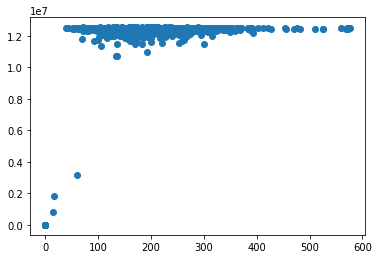

In [30]:
plt.scatter(
    eth_data.blocks['transaction_count'], 
    eth_data.blocks['gas_used']
)

0       203
1       198
2       156
3       163
4       304
       ... 
6471    137
6472    212
6473    201
6474    162
6475    233
Name: transaction_count, Length: 6476, dtype: int64